Question #1

In [2]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [3]:
length = 5
qubits = [cirq.GridQubit(0, x) for x in range(length)]
qubits

[cirq.GridQubit(0, 0),
 cirq.GridQubit(0, 1),
 cirq.GridQubit(0, 2),
 cirq.GridQubit(0, 3),
 cirq.GridQubit(0, 4)]

In [4]:
circuit = cirq.Circuit()
circuit.append([cirq.H(qubits[i]) for i in range(length)])
circuit.append([cirq.CNOT(qubits[i], qubits[i+1]) for i in range(length-1)])
circuit.append([cirq.SWAP(qubits[0], qubits[4])])
circuit.append([(cirq.rx(3.14)**0.5)(qubits[i]) for i in range(length)], strategy = cirq.InsertStrategy.NEW_THEN_INLINE)

circuit

(0, 0): ───H───@───────────────×───Rx(0.5π)───
               │               │
(0, 1): ───H───X───@───────────┼───Rx(0.5π)───
                   │           │
(0, 2): ───H───────X───@───────┼───Rx(0.5π)───
                       │       │
(0, 3): ───H───────────X───@───┼───Rx(0.5π)───
                           │   │
(0, 4): ───H───────────────X───×───Rx(0.5π)───

Question #2

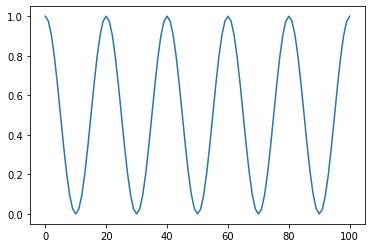

In [9]:
q = cirq.LineQubit(1)
circuit = cirq.Circuit()

step = 10 #Rotates by (pi/step) radians every iteration

simulator = cirq.Simulator()
result = simulator.simulate(circuit, qubit_order = [q])
pr = [abs(result.state_vector()[0])**2/(abs(result.state_vector()[0])**2+abs(result.state_vector()[1])**2)]
for i in range(10*step):
    circuit.append([(cirq.rx(3.14)**(1/step))(q)])
    result = simulator.simulate(circuit, qubit_order = [q])
    pr += [abs(result.state_vector()[0])**2/(abs(result.state_vector()[0])**2+abs(result.state_vector()[1])**2)]
plt.plot(pr)
plt.show()
